# Analysis of measurement range of EVI data from 2007
* Distribution of points over range and its comparison with DWEL. 

In [1]:
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
sns.set_context('poster')
sns.set_style('whitegrid')

In [3]:
dpi = 300
outfigdir = '../figures'

In [4]:
# names of point files
nir_pts_files = [ \
                 "/projectnb/echidna/lidar/EVI_Processing/HF2007/hfhd-2007/hfhd-2007-cp/Scan21_HarvFor_Plot01CP_ND015_cube_nu_basefix_nu_satfix_pfilter_at_project_ptcl.log", \
                 "/projectnb/echidna/lidar/EVI_Processing/HF2007/hfhd-2007/hfhd-2007-ne/Scan19_HarvFor_Plot01NE_ND015_cube_nu_basefix_nu_satfix_pfilter_at_project_ptcl.log", \
                 "/projectnb/echidna/lidar/EVI_Processing/HF2007/hfhd-2007/hfhd-2007-nw/Scan15_HarvFor_Plot01NW_ND015_cube_nu_basefix_nu_satfix_pfilter_at_project_ptcl.log", \
                 "/projectnb/echidna/lidar/EVI_Processing/HF2007/hfhd-2007/hfhd-2007-se/Scan75_Harvard_Plot01SE_ND015_cube_nu_basefix_nu_satfix_pfilter_at_project_ptcl.log", \
                 "/projectnb/echidna/lidar/EVI_Processing/HF2007/hfhd-2007/hfhd-2007-sw/Scan17_HarvFor_Plot01SW_ND015_cube_nu_basefix_nu_satfix_pfilter_at_project_ptcl.log" \
                ]

In [5]:
def read_points(pts_file):
    pts = np.genfromtxt(pts_file, delimiter=',', skip_header=3, usecols=(0,1,2,3,8))
    return pts

In [6]:
def get_range_hist(pts, bins=np.arange(0, 100, 0.5)):
    inpts_flag = pts[:, 4] != 0
    hist, bin_edges = np.histogram(pts[inpts_flag, 4], bins=bins)
    return hist, (bin_edges[:-1]+bin_edges[1:])*0.5

# Plot histograms of range values

In [7]:
bins = np.arange(0, 100, 0.5)
nir_hists_2007 = pd.DataFrame(data=np.zeros((len(bins)-1, len(nir_pts_files)+1), dtype=np.float), columns=['bin_center', 'CP', 'NE', 'NW', 'SE', 'SW'])
for n, fname_nir in enumerate(nir_pts_files):
    nir_hists_2007.iloc[:, n+1], bin_center = get_range_hist(read_points(fname_nir), bins=bins)

nir_hists_2007.iloc[:, 0] = bin_center

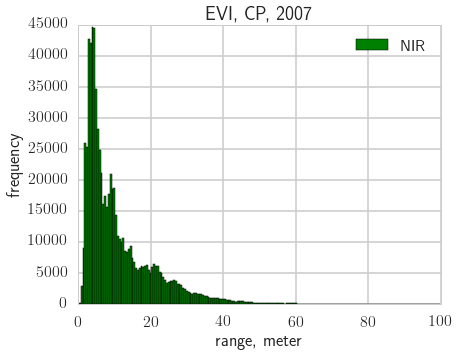

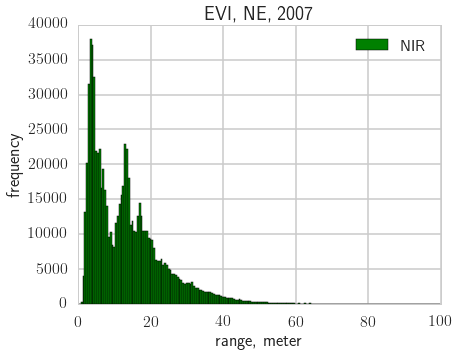

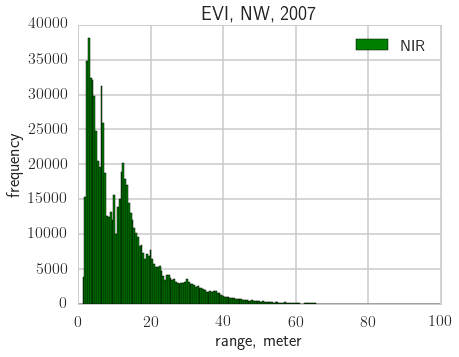

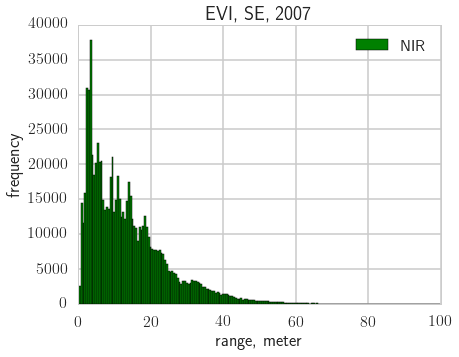

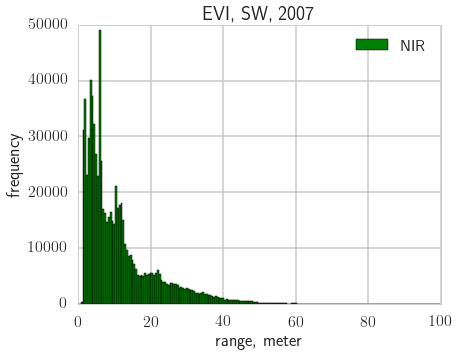

In [8]:
for n, plot_name in enumerate(nir_hists_2007.columns.values[1:]):
    fig, ax = plt.subplots(figsize=(6.5, 5))
    bar_width = nir_hists_2007.iloc[1, 0] - nir_hists_2007.iloc[0, 0]
    ax.bar(nir_hists_2007.iloc[:, 0], nir_hists_2007.iloc[:, n+1], color='green', width=bar_width, alpha=1.0, label='NIR')
    ax.set_title('EVI, {0:s}, 2007'.format(plot_name))
    ax.set_xlabel('range, meter')
    ax.set_ylabel('frequency')
    ax.legend()
    plt.savefig('{0:s}/evi_range_hist_nir_2007_{1:s}.png'.format(outfigdir, plot_name), \
                dpi=dpi, bbox_inches='tight', pad_inches=0.)

In [10]:
dwel_nir_pts_files = [ \
                 "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-C/HFHD_20150919_C_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                 "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-E/HFHD_20150919_E_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                 "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-N/HFHD_20150919_N_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                 "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-S/HFHD_20150919_S_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt", \
                 "/projectnb/echidna/lidar/DWEL_Processing/HF2015/HFHD20150919/HFHD20150919-W/HFHD_20150919_W_1064_cube_bsfix_pxc_update_atp2_ptcl_points.txt" \
                ]

In [29]:
bins = np.arange(0, 100, 0.5)
nir_hists_2015 = pd.DataFrame(data=np.zeros((len(bins)-1, len(dwel_nir_pts_files)+1), dtype=np.float), columns=['bin_center', 'C', 'E', 'N', 'S', 'W'])
for n, fname_nir in enumerate(dwel_nir_pts_files):
    nir_hists_2015.iloc[:, n+1], bin_center = get_range_hist(read_points(fname_nir), bins=bins)

nir_hists_2015.iloc[:, 0] = bin_center

In [12]:
rg_break = [30, 60]
rg_lb = [0] + rg_break
rg_ub = rg_break + [nir_hists_2007.loc[:, 'bin_center'].max()]

In [30]:
nir_pts_cnt_stats_2007 = pd.DataFrame(np.zeros((len(rg_lb), 5)), columns=('CP', 'NE', 'NW', 'SE', 'SW'))
for i in range(len(rg_lb)):
    tmpind = np.where(np.logical_and(nir_hists_2007.loc[:, 'bin_center']>=rg_lb[i],  
                       nir_hists_2007.loc[:, 'bin_center']<rg_ub[i]))[0]
    nir_pts_cnt_stats_2007.iloc[i, :] = nir_hists_2007.iloc[tmpind, 1:].sum()
    
nir_pts_cnt_stats_2015 = pd.DataFrame(np.zeros((len(rg_lb), 5)), columns=('C', 'E', 'N', 'S', 'W'))
for i in range(len(rg_lb)):
    tmpind = np.where(np.logical_and(nir_hists_2015.loc[:, 'bin_center']>=rg_lb[i],  
                       nir_hists_2015.loc[:, 'bin_center']<rg_ub[i]))[0]
    nir_pts_cnt_stats_2015.iloc[i, :] = nir_hists_2015.iloc[tmpind, 1:].sum()

In [31]:
print nir_pts_cnt_stats_2007
print nir_pts_cnt_stats_2007.sum()
print nir_pts_cnt_stats_2007.T.describe()

       CP      NE      NW      SE      SW
0  709646  714432  709079  733639  732360
1   36151   51447   58293   68110   47401
2     462     705    1157    1209     460
CP    746259
NE    766584
NW    768529
SE    802958
SW    780221
dtype: float64
                   0             1            2
count       5.000000      5.000000     5.000000
mean   719831.200000  52280.400000   798.600000
std     12207.842098  11951.864281   365.235951
min    709079.000000  36151.000000   460.000000
25%    709646.000000  47401.000000   462.000000
50%    714432.000000  51447.000000   705.000000
75%    732360.000000  58293.000000  1157.000000
max    733639.000000  68110.000000  1209.000000


In [41]:
nir_pdf_2007_c = nir_hists_2007.loc[:, 'CP']/nir_pts_cnt_stats_2007.sum().loc['CP']
nir_pdf_2015_c = nir_hists_2015.loc[:, 'C']/nir_pts_cnt_stats_2015.sum().loc['C']

# nir_pdf_2007_c = nir_hists_2007.loc[:, 'CP']/nir_hists_2007.loc[:, 'CP'].max()
# nir_pdf_2015_c = nir_hists_2015.loc[:, 'C']/nir_hists_2015.loc[:, 'C'].max()

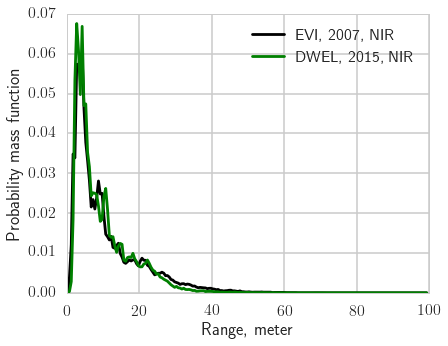

In [42]:
fig, ax = plt.subplots(figsize=(6.5, 5))
ax.plot(nir_hists_2007.loc[:, 'bin_center'], nir_pdf_2007_c, '-k', label='EVI, 2007, NIR')
ax.plot(nir_hists_2015.loc[:, 'bin_center'], nir_pdf_2015_c, '-g', label='DWEL, 2015, NIR')
ax.set_xlabel('Range, meter')
ax.set_ylabel('Probability mass function')
ax.legend()
plt.savefig('../figures/range_hist_pmf_evi_2007_vs_dwel_2015.png', 
            dpi=dpi, bbox_inches='tight', pad_inches=0.)

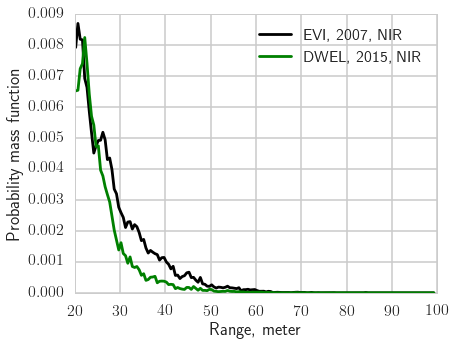

In [43]:
min_rg = 20
fig, ax = plt.subplots(figsize=(6.5, 5))
tmpmask = nir_hists_2007.loc[:, 'bin_center']>min_rg
ax.plot(nir_hists_2007.loc[tmpmask, 'bin_center'], nir_pdf_2007_c[tmpmask], '-k', label='EVI, 2007, NIR')
tmpmask = nir_hists_2015.loc[:, 'bin_center']>min_rg
ax.plot(nir_hists_2015.loc[tmpmask, 'bin_center'], nir_pdf_2015_c[tmpmask], '-g', label='DWEL, 2015, NIR')
ax.set_xlabel('Range, meter')
ax.set_ylabel('Probability mass function')
ax.legend()
plt.savefig('../figures/range_hist_pmf_evi_2007_vs_dwel_2015_gt_{0:d}.png'.format(min_rg), 
            dpi=dpi, bbox_inches='tight', pad_inches=0.)

In [45]:
min_rg = 30
tmpmask = nir_hists_2007.loc[:, 'bin_center']>min_rg
pdf_tail_nir_2007 = nir_pdf_2007_c[tmpmask].sum()
tmpmask = nir_hists_2015.loc[:, 'bin_center']>min_rg
pdf_tail_nir_2015 = nir_pdf_2015_c[tmpmask].sum()
print pdf_tail_nir_2007, pdf_tail_nir_2015
print pdf_tail_nir_2015/pdf_tail_nir_2007

0.049062054863 0.0186793976743
0.380730031111
